In [79]:
import os
os.chdir('/Users/Olivier/anaconda3/envs/guitarsounds')
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
%autoreload 2
from guitarsounds.analysis import SoundPack, Sound, Signal
import guitarsounds as guit

In [41]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
from tabulate import tabulate

# Developping Frequency Bin Integration Analysis

## Get two signals

In [42]:
# Get a signal to test
Son1 = Sound('soundfiles/flax_carbon/Carbon_E0_1.wav').condition(return_self=True)
Son2 = Sound('soundfiles/flax_carbon/Wood_E0_1.wav').condition(return_self=True)
Pack = SoundPack(Son1, Son2, names=['Carbon', 'Wood'])

## Compute cumulative envelop integral

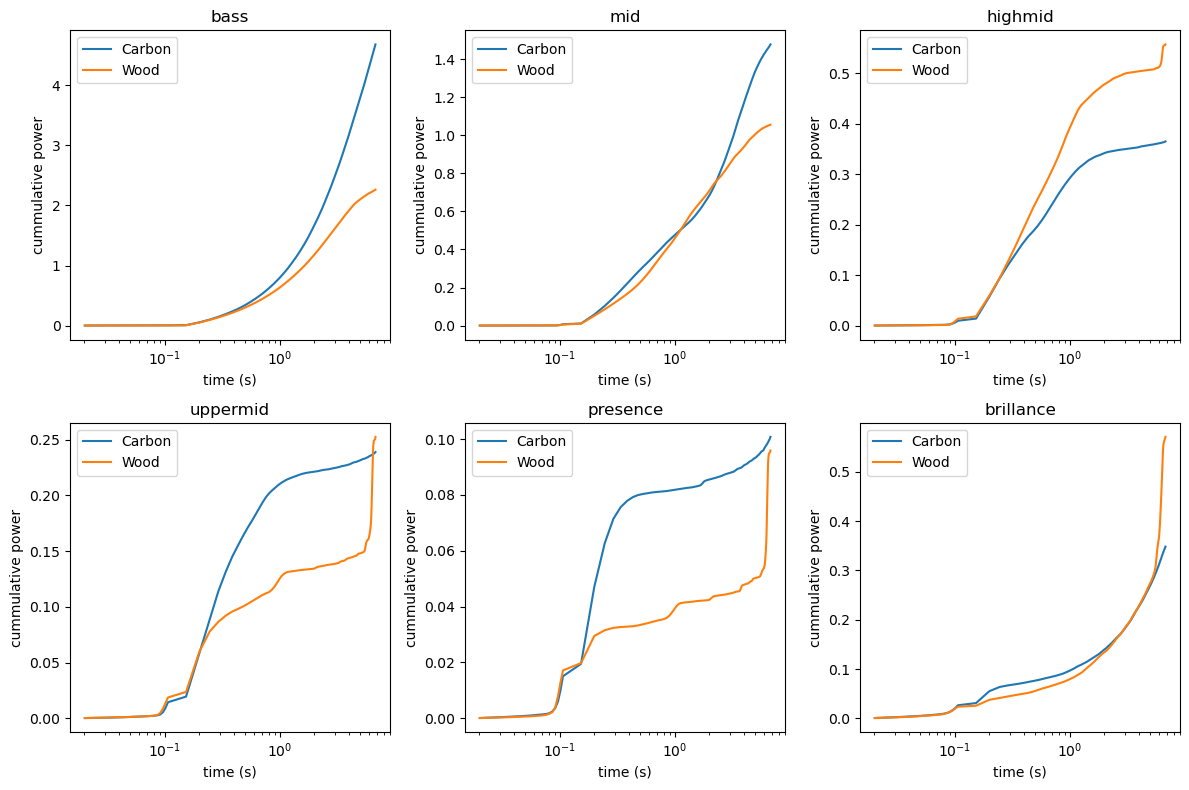

In [15]:
fig, axs = plt.subplots(2,3, figsize=(12,8))
axs = axs.reshape(-1)
bin_strings = Pack.sounds[0].bins.keys()
bins1 = Pack.sounds[0].bins.values()
bins2 = Pack.sounds[1].bins.values()

for signal1, signal2, bin_string, ax in zip(bins1, bins2, bin_strings, axs):
    
    log_envelop1, log_time1 = signal1.normalize().log_envelop()
    log_envelop2, log_time2 = signal2.normalize().log_envelop()
    integ = scipy.integrate.trapezoid

    integral1 = [integ(log_envelop1[:i], log_time1[:i]) for i in np.arange(2, len(log_envelop1), 1)]
    integral2 = [integ(log_envelop2[:i], log_time2[:i]) for i in np.arange(2, len(log_envelop2), 1)]
    time1 = log_time1[2:len(log_time1):1]
    time2 = log_time2[2:len(log_time2):1]
    trim_index = 1
    
    ax.plot(time1[:-trim_index], integral1[:-trim_index], label=Son1.name)
    ax.plot(time2[:-trim_index], integral2[:-trim_index], label=Son2.name)
    ax.set_xlabel('time (s)')
    ax.set_ylabel('cummulative power')
    ax.set_xscale('log')
    ax.set_title(bin_string)
    ax.legend()
plt.tight_layout()
plt.show()

## Compute total envelop integral

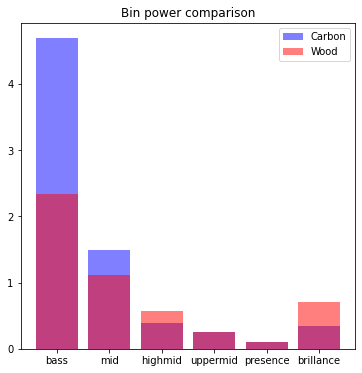

___ Signal Power Frequency Bin Distribution ___ 

bin          Carbon      Wood
---------  --------  --------
bass       4.68906   2.33457
mid        1.48521   1.11638
highmid    0.387718  0.565905
uppermid   0.255552  0.255153
presence   0.109646  0.105022
brillance  0.350991  0.705437


In [133]:
bin_strings = Pack.sounds[0].bins.keys()
bins1 = Pack.sounds[0].bins.values()
bins2 = Pack.sounds[1].bins.values()
integrals1 = {}
integrals2 = {}

for signal1, signal2, bin_string in zip(bins1, bins2, bin_strings):
    
    log_envelop1, log_time1 = signal1.normalize().log_envelop()
    log_envelop2, log_time2 = signal2.normalize().log_envelop()
    
    integrals1[bin_string] = scipy.integrate.trapezoid(log_envelop1, log_time1)
    integrals2[bin_string] = scipy.integrate.trapezoid(log_envelop2, log_time2)

#integrals1 = {bin_string:integrals1[bin_string]/max(integrals1.values()) for bin_string in integrals1}
#integrals2 = {bin_string:integrals2[bin_string]/max(integrals2.values()) for bin_string in integrals2}

fig, ax1 = plt.subplots(figsize=(6,6))

ax1.bar(integrals1.keys(), integrals1.values(), alpha=0.5, color='b', label=Son1.name)
ax1.bar(integrals2.keys(), integrals2.values(), alpha=0.5, color='r', label=Son2.name)
#ax1.set_yscale('log')
ax1.legend()
ax1.set_title('Bin power comparison')
plt.show()

table_data = [[bin_string, integral1, integral2] for bin_string, integral1, integral2 in zip(integrals1.keys(), integrals1.values(), integrals2.values())]

print('___ Signal Power Frequency Bin Distribution ___ \n')
print(tabulate(table_data, headers = ['bin', Son1.name, Son2.name]))

## Frequency bin time plot with diff

## Integral plot with diff

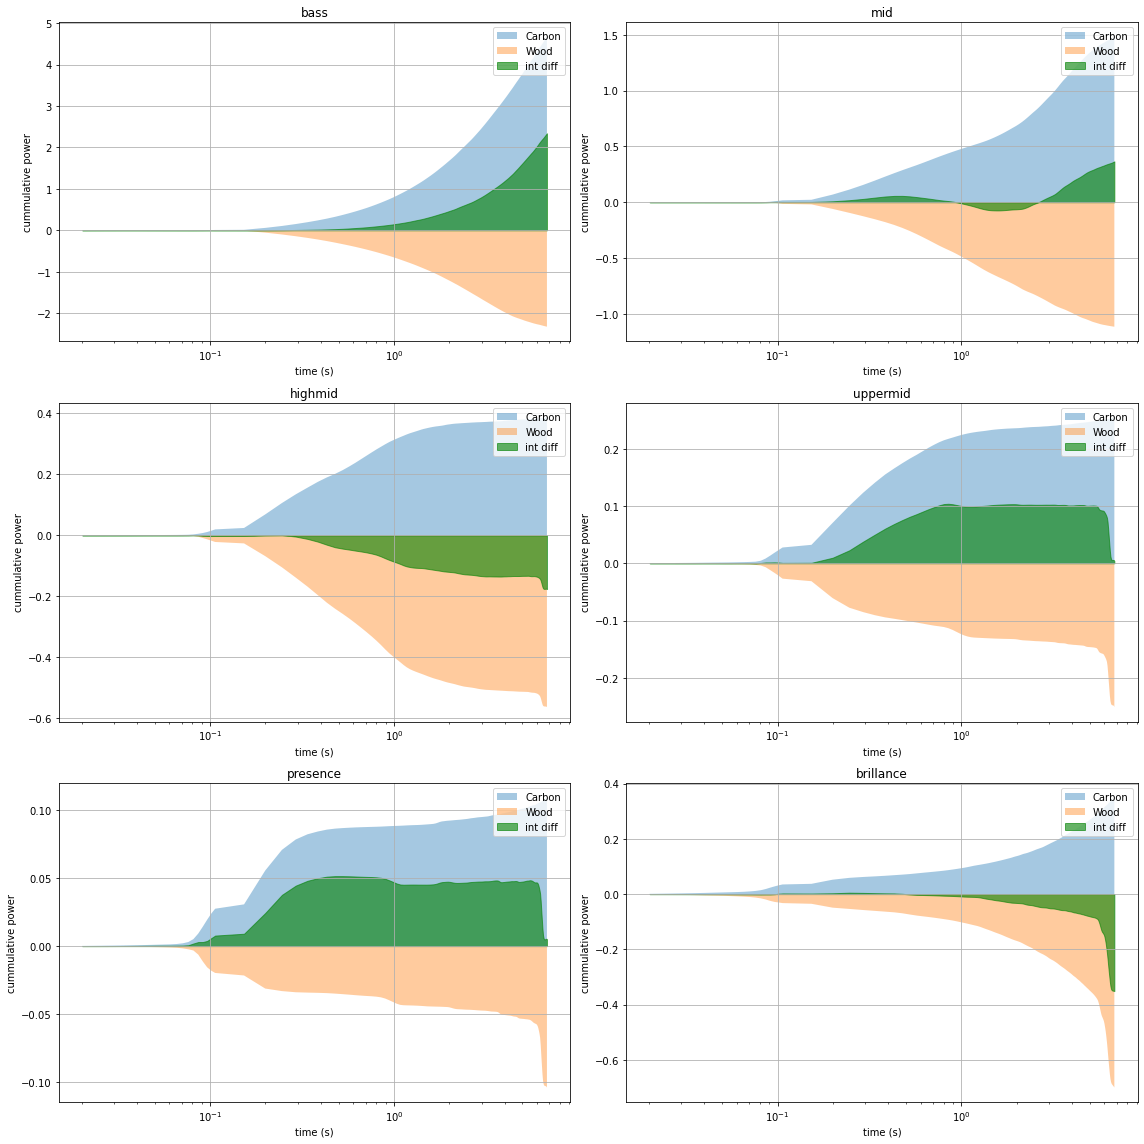

In [163]:
fig, axs = plt.subplots(3,2, figsize=(16,16))
axs = axs.reshape(-1)
bin_strings = Pack.sounds[0].bins.keys()
bins1 = Pack.sounds[0].bins.values()
bins2 = Pack.sounds[1].bins.values()

for signal1, signal2, bin_string, ax in zip(bins1, bins2, bin_strings, axs):
    
    log_envelop1, log_time1 = signal1.normalize().log_envelop()
    log_envelop2, log_time2 = signal2.normalize().log_envelop()
    integ = scipy.integrate.trapezoid

    integral1 = np.array([integ(log_envelop1[:i], log_time1[:i]) for i in np.arange(2, len(log_envelop1), 1)])
    integral2 = np.array([integ(log_envelop2[:i], log_time2[:i]) for i in np.arange(2, len(log_envelop2), 1)])
    time1 = log_time1[2:len(log_time1):1]
    time2 = log_time2[2:len(log_time2):1]
    
    int_index = np.min([integral1.shape[0], integral2.shape[0]])
    ax.fill_between(time1, integral1, label=Son1.name, alpha=0.4)
    ax.fill_between(time2, -integral2, label=Son2.name, alpha=0.4)
    ax.fill_between(time2, integral1 - integral2, color='g', label='int diff', alpha=0.6)
    
    ax.set_xlabel('time (s)')
    ax.set_ylabel('cummulative power')
    ax.set_xscale('log')
    ax.set_title(bin_string)
    ax.legend()
    ax.grid('on')
plt.tight_layout()

# Implementation

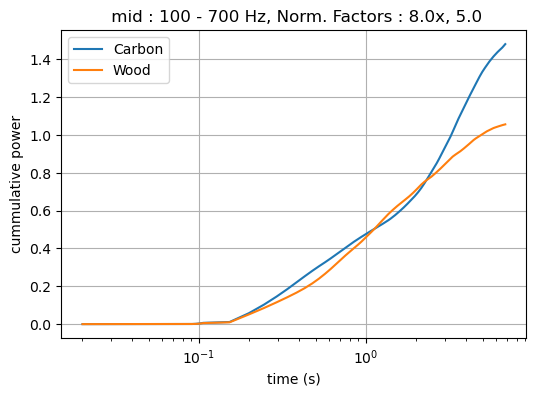

In [57]:
Pack.bin_integral_plot(f_bin='mid')
plt.show()

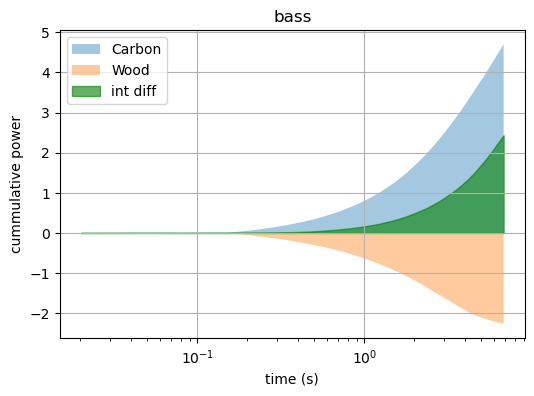

In [54]:
Pack.integral_compare(f_bin = 'bass')
plt.show()

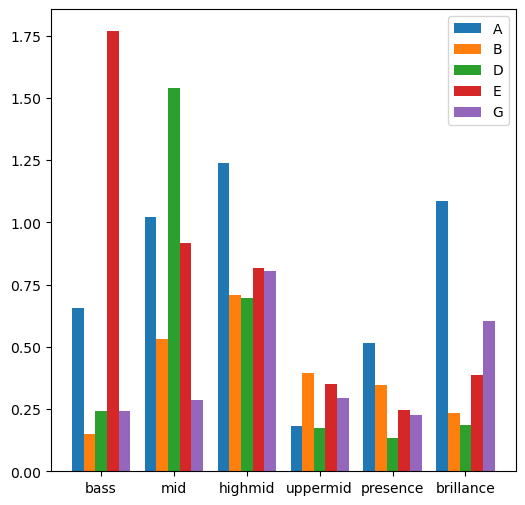

In [115]:
files = ['soundfiles/Wood_Guitar/Wood_A0_1.wav',
         'soundfiles/Wood_Guitar/Wood_B0_1.wav',
         'soundfiles/Wood_Guitar/Wood_D0_1.wav',
         'soundfiles/Wood_Guitar/Wood_E0_2.wav',
         'soundfiles/Wood_Guitar/Wood_G0_2.wav', ]

Pack = SoundPack(files, names = ['A', 'B', 'D', 'E', 'G'])

Pack.bin_power_hist()
plt.show()